# Comparación de coordenadas

Coordenadas de pyPDF2:

In [1]:
import json

In [2]:
cord_sol = []
with open('pypdf2/pyPDF2_coords.json', 'r') as fb:
    for i in json.load(fb):
        cord_sol.append(i['/Rect'])
cord_sol

[[89.867, 581.13, 102.583, 593.846],
 [111.549, 581.13, 124.265, 593.846],
 [133.232, 581.13, 145.948, 593.846],
 [154.914, 581.13, 167.631, 593.846],
 [176.597, 581.13, 189.313, 593.846],
 [198.28, 581.13, 210.996, 593.846],
 [219.962, 581.13, 232.678, 593.846],
 [241.645, 581.13, 254.361, 593.846],
 [263.327, 581.13, 276.044, 593.846],
 [285.01, 581.13, 297.726, 593.846],
 [89.867, 564.885, 102.583, 577.602],
 [111.549, 564.885, 124.265, 577.602],
 [133.232, 564.885, 145.948, 577.602],
 [154.914, 564.885, 167.631, 577.602],
 [176.597, 564.885, 189.313, 577.602],
 [198.28, 564.885, 210.996, 577.602],
 [219.962, 564.885, 232.678, 577.602],
 [241.645, 564.885, 254.361, 577.602],
 [263.327, 564.885, 276.044, 577.602],
 [285.01, 564.885, 297.726, 577.602],
 [93.245, 498.248, 105.961, 510.965],
 [93.245, 482.308, 105.961, 495.024],
 [93.245, 466.368, 105.961, 479.084],
 [93.245, 450.428, 105.961, 463.144]]

Coordenadas de boxdetect

In [3]:
import json
with open('boxdetect/boxdetect_coords.json', 'r') as fb:
    cord_scan = json.load(fb)
cord_scan

[[188, 518, 27, 27],
 [232, 518, 27, 27],
 [278, 518, 27, 27],
 [324, 518, 27, 27],
 [368, 518, 27, 27],
 [414, 518, 27, 27],
 [458, 518, 27, 27],
 [504, 518, 27, 27],
 [550, 518, 27, 27],
 [594, 518, 27, 27],
 [188, 552, 27, 27],
 [232, 552, 27, 27],
 [278, 552, 27, 27],
 [324, 552, 27, 27],
 [368, 552, 27, 27],
 [414, 552, 27, 27],
 [458, 552, 27, 27],
 [504, 552, 27, 27],
 [550, 552, 27, 27],
 [594, 552, 27, 27],
 [194, 690, 27, 27],
 [194, 724, 27, 27],
 [194, 756, 27, 27],
 [194, 789, 29, 29]]

## Extraer las coordenadas x e y de pyPDF2, boxdetect y boxdetect transformadas

Comparando las coordenadas de pyPDF2 y boxdetect, obtengo una aproximación:

x_pyPDF2 = x_boxdetect / 2

y_pyPDF2 = 840 - y_boxdetect / 2

In [4]:
import numpy as np

In [5]:
cord_sol = np.array(cord_sol)
cord_scan = np.array(cord_scan)

In [6]:
x_cord = np.concatenate(
    (np.array([cord_sol[:,0]]).T,
     np.array([cord_scan[:,0]]).T,
     np.array([cord_scan[:,0]]).T/2), axis=1)

In [7]:
y_cord = np.concatenate(
    (np.array([cord_sol[:,1]]).T,
     np.array([cord_scan[:,1]]).T,
     840-np.array([cord_scan[:,1]]).T/2), axis=1)

Mostrando las gráficas de las coordenadas con matplotlib

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

(0.0, 700.0)

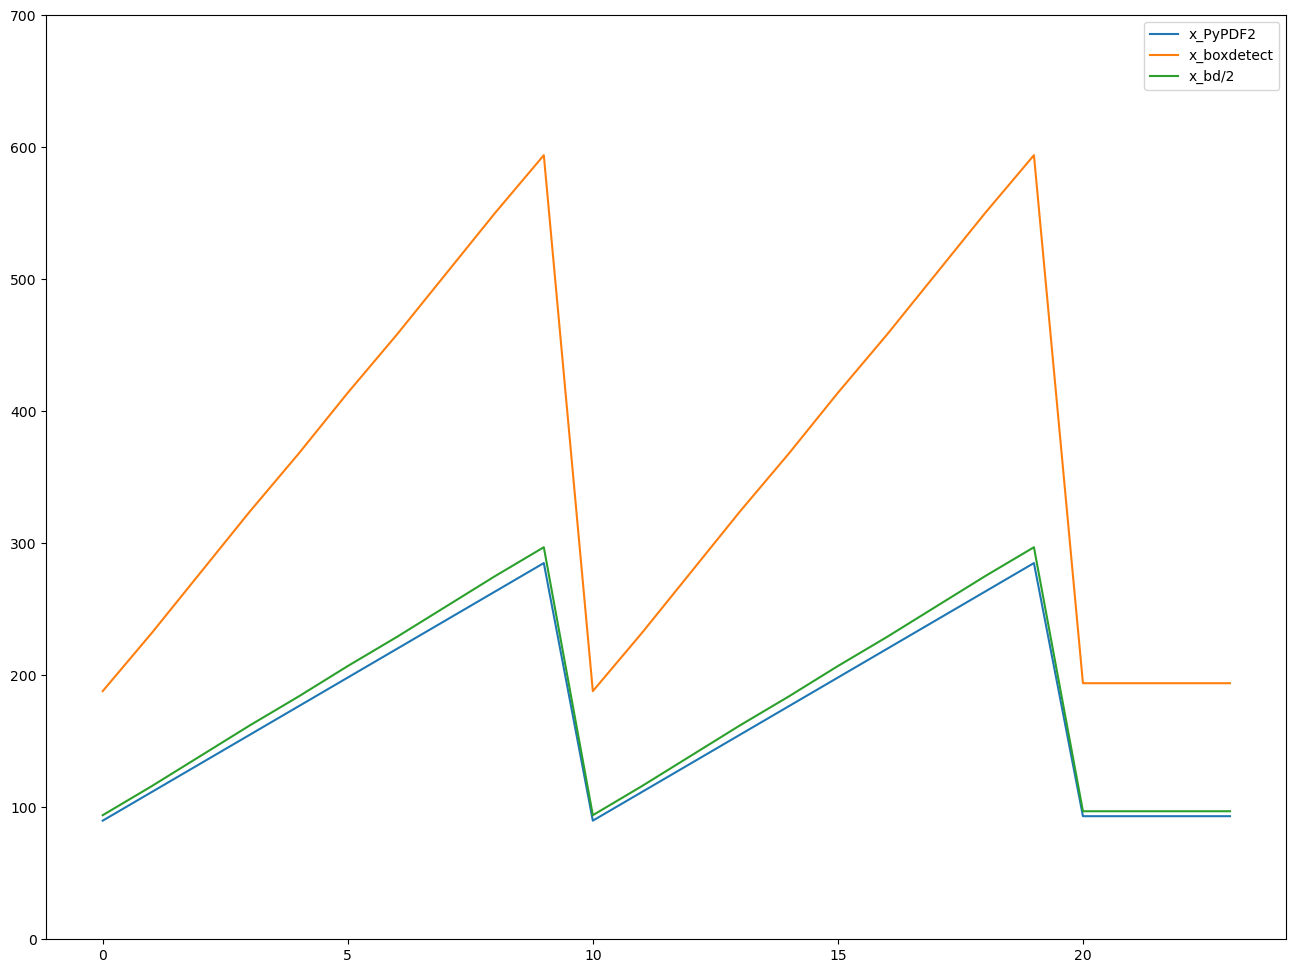

In [9]:
fig, ax = plt.subplots()
dfx = pd.DataFrame(x_cord)
dfx[0] = dfx[0].astype(float)
dfx[1] = dfx[1].astype(float)
dfx.plot(figsize=(16,12), ax=ax)
ax.legend(["x_PyPDF2", "x_boxdetect", "x_bd/2"])
ax.set_ylim(0,700)

(400.0, 900.0)

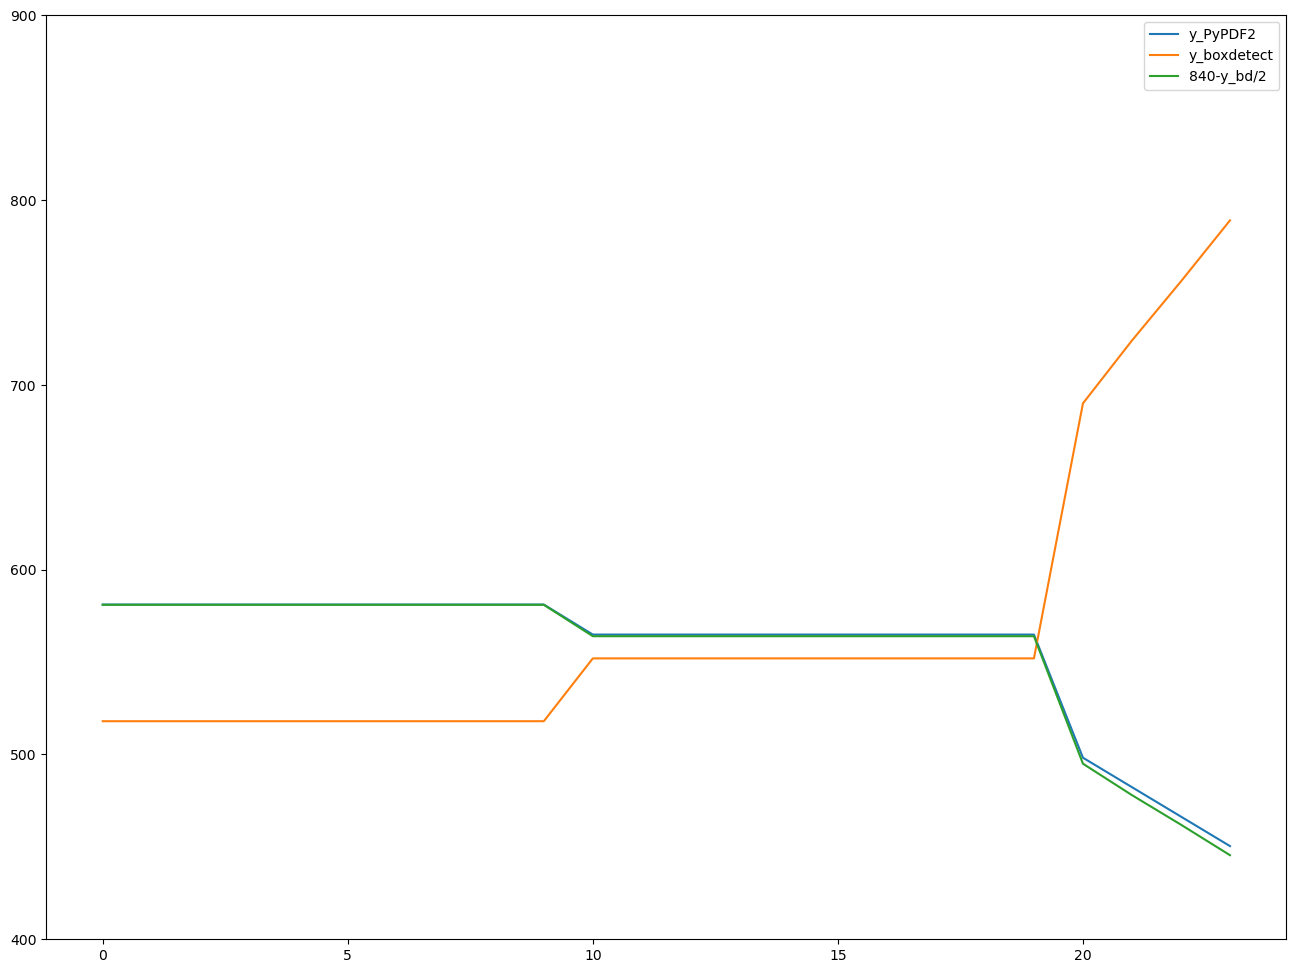

In [10]:
fig, ax = plt.subplots()
dfy = pd.DataFrame(y_cord)
dfy[0] = dfy[0].astype(float)
dfy[1] = dfy[1].astype(float)
dfy.plot(figsize=(16,12), ax=ax)
ax.legend(["y_PyPDF2", "y_boxdetect", "840-y_bd/2"])
ax.set_ylim(400,900)

In [11]:
cx = (np.array([cord_sol[:,0]]).T, np.array([cord_scan[:,0]]).T)
cx

(array([[ 89.867],
        [111.549],
        [133.232],
        [154.914],
        [176.597],
        [198.28 ],
        [219.962],
        [241.645],
        [263.327],
        [285.01 ],
        [ 89.867],
        [111.549],
        [133.232],
        [154.914],
        [176.597],
        [198.28 ],
        [219.962],
        [241.645],
        [263.327],
        [285.01 ],
        [ 93.245],
        [ 93.245],
        [ 93.245],
        [ 93.245]]),
 array([[188],
        [232],
        [278],
        [324],
        [368],
        [414],
        [458],
        [504],
        [550],
        [594],
        [188],
        [232],
        [278],
        [324],
        [368],
        [414],
        [458],
        [504],
        [550],
        [594],
        [194],
        [194],
        [194],
        [194]]))

In [12]:
aux = []
for i in range(1,24):
    m1 = (cx[1][i] - cx[1][i-1])
    m2 = (cx[0][i] - cx[0][i-1])
    if m2 == 0:
        m = 2
    else:
        m = m1/m2
    n = cx[1][i] - m * cx[0][i]
    aux.append([m,n[0]])
aux

[[array([2.02933309]), 5.629923438797164],
 [array([2.12147766]), -4.648710971729088],
 [array([2.1215755]), -4.661747071303523],
 [array([2.0292395]), 9.64239265784289],
 [array([2.12147766]), -6.646589494073794],
 [array([2.02933309]), 11.623835439534844],
 [array([2.12147766]), -8.644468016417932],
 [array([2.1215755]), -8.668111797804954],
 [array([2.0292395]), 15.64645113683514],
 [array([2.08052556]), 1.0294092024822419],
 [array([2.02933309]), 5.629923438797164],
 [array([2.12147766]), -4.648710971729088],
 [array([2.1215755]), -4.661747071303523],
 [array([2.0292395]), 9.64239265784289],
 [array([2.12147766]), -6.646589494073794],
 [array([2.02933309]), 11.623835439534844],
 [array([2.12147766]), -8.644468016417932],
 [array([2.1215755]), -8.668111797804954],
 [array([2.0292395]), 15.64645113683514],
 [array([2.08588637]), -0.49847469559097135],
 [2, 7.509999999999991],
 [2, 7.509999999999991],
 [2, 7.509999999999991]]

In [13]:
cy = (np.array([cord_sol[:,1]]).T, np.array([cord_scan[:,1]]).T)
cy

(array([[581.13 ],
        [581.13 ],
        [581.13 ],
        [581.13 ],
        [581.13 ],
        [581.13 ],
        [581.13 ],
        [581.13 ],
        [581.13 ],
        [581.13 ],
        [564.885],
        [564.885],
        [564.885],
        [564.885],
        [564.885],
        [564.885],
        [564.885],
        [564.885],
        [564.885],
        [564.885],
        [498.248],
        [482.308],
        [466.368],
        [450.428]]),
 array([[518],
        [518],
        [518],
        [518],
        [518],
        [518],
        [518],
        [518],
        [518],
        [518],
        [552],
        [552],
        [552],
        [552],
        [552],
        [552],
        [552],
        [552],
        [552],
        [552],
        [690],
        [724],
        [756],
        [789]]))

In [14]:
auy = []
for i in range(1,24):
    m1 = (cy[1][i] - cy[1][i-1])
    m2 = (cy[0][i] - cy[0][i-1])
    if m2 == 0:
        m = -2
    else:
        m = m1/m2
    n = cy[1][i] - m * cy[0][i]
    auy.append([m,n[0]])
auy

[[-2, 1680.26],
 [-2, 1680.26],
 [-2, 1680.26],
 [-2, 1680.26],
 [-2, 1680.26],
 [-2, 1680.26],
 [-2, 1680.26],
 [-2, 1680.26],
 [-2, 1680.26],
 [array([-2.09295168]), 1734.2770083102491],
 [-2, 1681.77],
 [-2, 1681.77],
 [-2, 1681.77],
 [-2, 1681.77],
 [-2, 1681.77],
 [-2, 1681.77],
 [-2, 1681.77],
 [-2, 1681.77],
 [-2, 1681.77],
 [array([-2.07092156]), 1721.8325254738359],
 [array([-2.13299875]), 1752.7623588456715],
 [array([-2.00752823]), 1692.2469259723966],
 [array([-2.07026349]), 1721.504642409034]]